<div style="text-align: center;">
<br>
<br>
<h1>Evaluating Machine Learning Classifiers for Predicting Credit Card Client Defaults</h1>
<br>
<br>
<br>
Luis Lopez,
Daniel Arday,
Steve Amancha       
<br>
<br>
<br>
<br>
</div>

## Introduction

The Default of Credit Card Clients dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients) comprises anonymized data on credit card holders from Taiwan. This dataset provides various attributes related to the demographic, financial, and transactional behavior of the clients, collected to analyze and predict default risk.

## Objective

**Our primary goal is to predict if credit card clients will default on their payment next month. Specifically, we aim to determine the factors that influence whether a client will default and to build predictive models for future clients with similar features. To achieve this, we plan to develop and compare the effectiveness of four different machine learning models, ultimately selecting the one that best predicts the default risk.**

## Data Description & Attribute Information

The Default of Credit Card Clients dataset comprises the following features:

1. **LIMIT_BAL**: The total credit amount provided in National Taiwanese Dollars (NT\$), covering both personal and family (supplementary) credit.
2. **SEX**: The gender of the client (1 for male, 2 for female).
3. **EDUCATION**: The client's education level (1 for graduate school, 2 for university, 3 for high school, 4 for others).
4. **MARRIAGE**: The marital status of the client (1 for married, 2 for single, 3 for others).
5. **AGE**: The age of the client, in yrs.
6. **PAY_0**: Repayment status in Sep 2005 (-1 indicates payment on time, 1 for a delay of 1 mo, 2 for 2 mos, up to 8 for 8 mos, and 9 for 9 mos or more).
7. **PAY_2**: Repayment status in Aug 2005 (same as above).
8. **PAY_3**: Repayment status in Jul 2005 (same as above).
9. **PAY_4**: Repayment status in Jun 2005 (same as above).
10. **PAY_5**: Repayment status in May 2005 (same as above).
11. **PAY_6**: Repayment status in Apr 2005 ( same as above).
12. **BILL_AMT1**: The amount of the bill statement in Sep 2005 (NT\$).
13. **BILL_AMT2**: The amount of the bill statement in Aug 2005 (NT\$).
14. **BILL_AMT3**: The amount of the bill statement in Jul 2005 (NT\$).
15. **BILL_AMT4**: The amount of the bill statement in Jun 2005 (NT\$).
16. **BILL_AMT5**: The amount of the bill statement in May 2005 (NT\$).
17. **BILL_AMT6**: The amount of the bill statement in Apr 2005 (NT\$).
18. **PAY_AMT1**: The amount of the previous payment made in Sep 2005 (NT\$).
19. **PAY_AMT2**: The amount of the previous payment made in Aug 2005 (NT\$).
20. **PAY_AMT3**: The amount of the previous payment made in Jul 2005 (NT\$).
21. **PAY_AMT4**: The amount of the previous payment made in Jun 2005 (NT\$).
22. **PAY_AMT5**: The amount of the previous payment made in May 2005 (NT\$).
23. **PAY_AMT6**: The amount of the previous payment made in Apr 2005 (NT\$).
24. **default.payment.next.month**: Indicator of whether the client defaulted on payment for the next month (1 for yes, 0 for no).


## Exploratory Data Analysis (EDA)

The notebook starts with loading the dataset and performing an initial inspection, including displaying the first few rows of data and identifying binary columns to check imbalances.
- Descriptive Statistics: Summary statistics are calculated to understand the distribution and central tendencies and spread of the features.
- Missing Values: None

Visualization:
- Target Variable Distribution: The distribution of the target variable (default payment next month) is visualized using a count plot to understand the balance of the classes.
- Correlation Matrix: A correlation matrix heatmap is plotted to identify relationships between features and the target variable.
- Scatter Plots: Scatter plots of bill amounts and payment amounts over time are created to visualize patterns and relationships between these features and the target variable.
- Box Plots: Box plots are used to visualize the distribution of credit limits by education level and marital status, segmented by default status. This helps in identifying potential      differences in default rates across different demographic groups.
- Outlier Analysis: Outlier treatment is applied to handle extreme values that could skew the analysis and model performance.

## Feature Engineering

- Handling Outliers: A function is defined to identify and remove outliers based on a specified threshold (mean ± 3 standard deviations). This step is crucial to ensure that the model is not adversely affected by extreme values. Dimensionality reduction approaches will also be evaluated to confimr if it will improve the overall performance of the model.
- Standardization: The dataset consist of features that contain short ranges and long ranges that can potentially affect the performance of the model, we will attempt to confirm this difference by running models with model scaled features and non-scaled features as well.
- Imbalance: The target class has a large imbalance. An approach to address this issue is to using SMOTE incase our model does not learn with new data during testing.


# Feature Selection

- During the EDA process, identify features that are highly correlated and assess their contribution to the machine learning model. Remove features that do not add significant value to avoid redundancy and improve model performance.
-  Evaluate existing features to determine if they can be engineered to provide more meaningful insights. Replace original features with engineered ones that offer enhanced predictive power or relevance to the analysis. 
- Application of Principal Component Analysis to reduce the number of features. PCA transforms the original dataset into a new set of features that maintain most of the original variance,  reducing the information without significant loss. This helps simplify the model while retaining essential data characteristics.

## Justification

- The process of understanding the data, visualizing key relationships, handling data quality issues such as outliers, and preparing the data for modeling are key components to buiding any predictive model. By exploring the dataset thoroughly and visualizing different aspects of the data, the analysis can uncover important patterns and relationships that will inform the modeling process. Handling outliers ensures that the model is robust as well as properly splitting and training the data, along with it's corresponding hyperparameter tuning, class imbalnce and standardization will be fundamental for the perfromance of our model.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score,recall_score,precision_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Loading libraries and understanding the data

In [2]:
df = pd.read_csv('default of credit card clients.csv', header=1, index_col=0)
pd.set_option('display.max_columns', None)
display(df.head(10))


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [3]:
# show the columns data types
print(df.dtypes)

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [4]:
# Searching for Binary columns
for i in df.columns:
    if df[i].value_counts().shape[0] <= 2:
        print(f'"{i}" is a binary column.')

"SEX" is a binary column.
"default payment next month" is a binary column.


In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isnull().sum().sum()

0

# Exploratory Data Analysis (EDA)

### Default Payments (Target Variable)

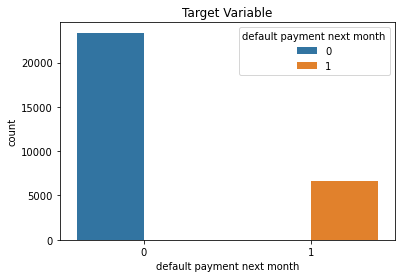

In [7]:
sns.countplot(data = df , x ='default payment next month', hue = 'default payment next month')
plt.title('Target Variable')
plt.show();

#### Insights on Default Payments

`default.payment.next.month` shows a significant imbalance. The majority of clients (~ 23,000) did not default, whereas a smaller portion (~ 6,000) did default. Therefore we plan to addressing class imbalance in our predictive models to avoid biased predictions and ensure accurate risk assessment.

### Heat Map

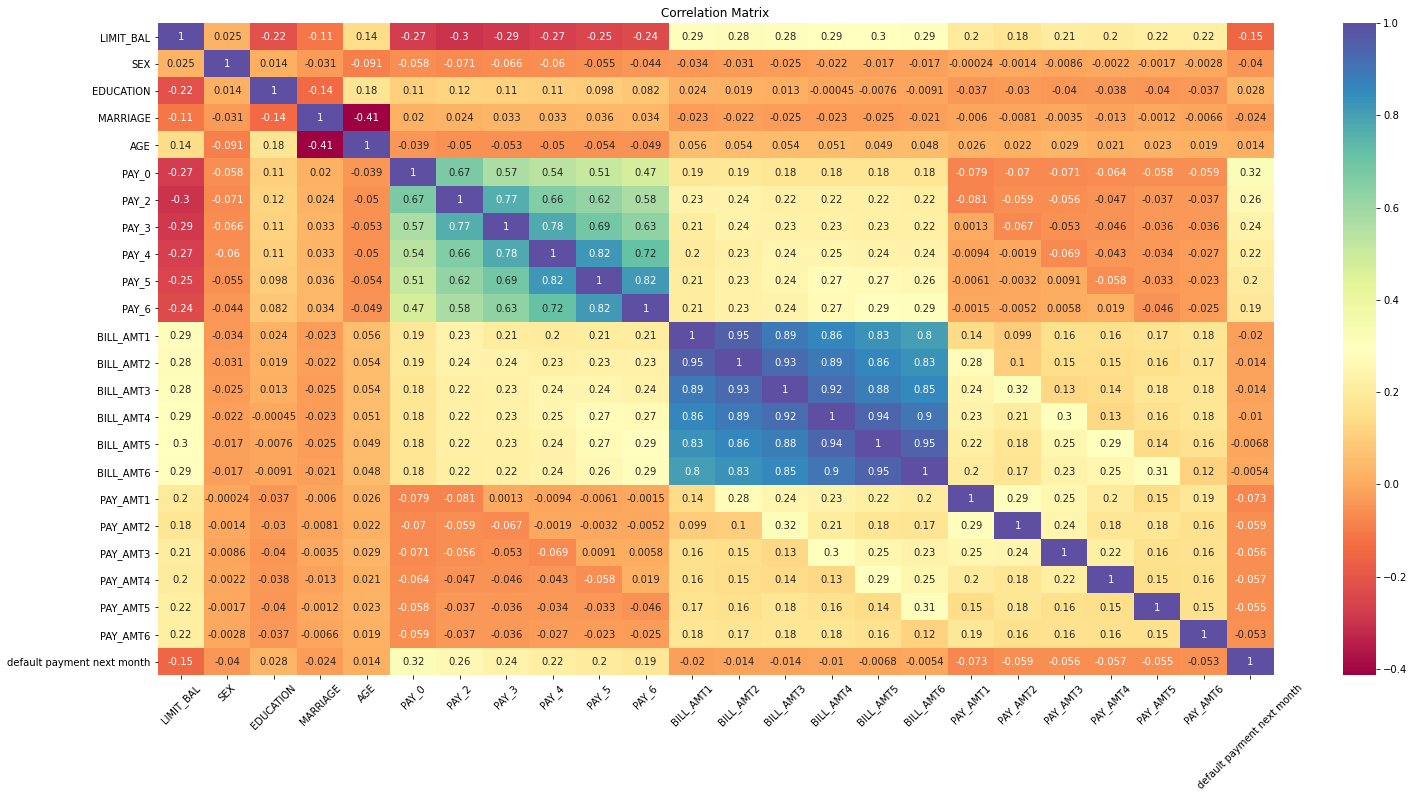

In [8]:
corr_mat = df.corr()
plt.figure(figsize = (25,12))
sns.heatmap(corr_mat, cmap='Spectral', annot= True)
plt.title('Correlation Matrix')
plt.xticks(rotation = 45)
plt.show();

#### Insights from Heat Map

1. **High Correlations Among Repayment Statuses**: The repayment status variables (`PAY_0` to `PAY_6`) show strong positive correlations with each other, indicating that clients who miss payments tend to miss multiple payments consecutively.

2. **Bill Amounts Correlation**: The bill statement amounts (`BILL_AMT1` to `BILL_AMT6`) are highly correlated with each other, suggesting that clients' spending patterns remain consistent across months.

3. **Default Payment Correlation**: The target variable, `default.payment.next.month`, has moderate positive correlations with repayment statuses, especially `PAY_0` (0.32), implying that recent repayment behavior is a significant predictor of default.

4. **Credit Limit and Default**: There is a negative correlation between the credit limit (`LIMIT_BAL`) and default payment next month (-0.15), indicating that clients with higher credit limits are less likely to default.

5. **Demographic Features**: Demographic features like `SEX`, `EDUCATION`, `MARRIAGE`, and `AGE` show relatively weak correlations with default payment, suggesting these attributes alone are less predictive of default risk compared to financial and repayment behaviors.

### Scatterplots

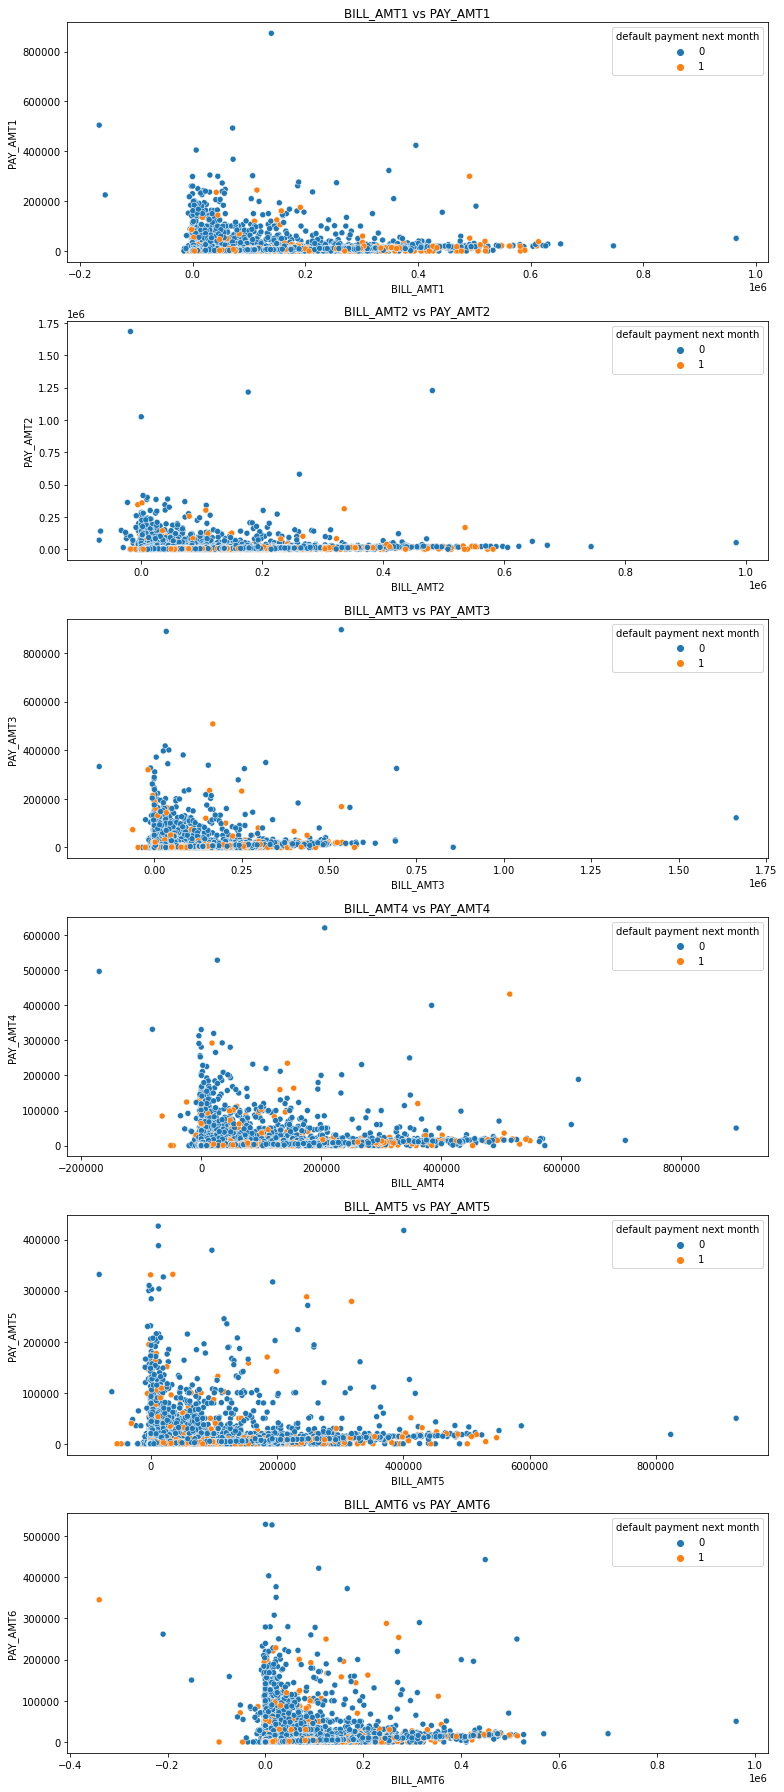

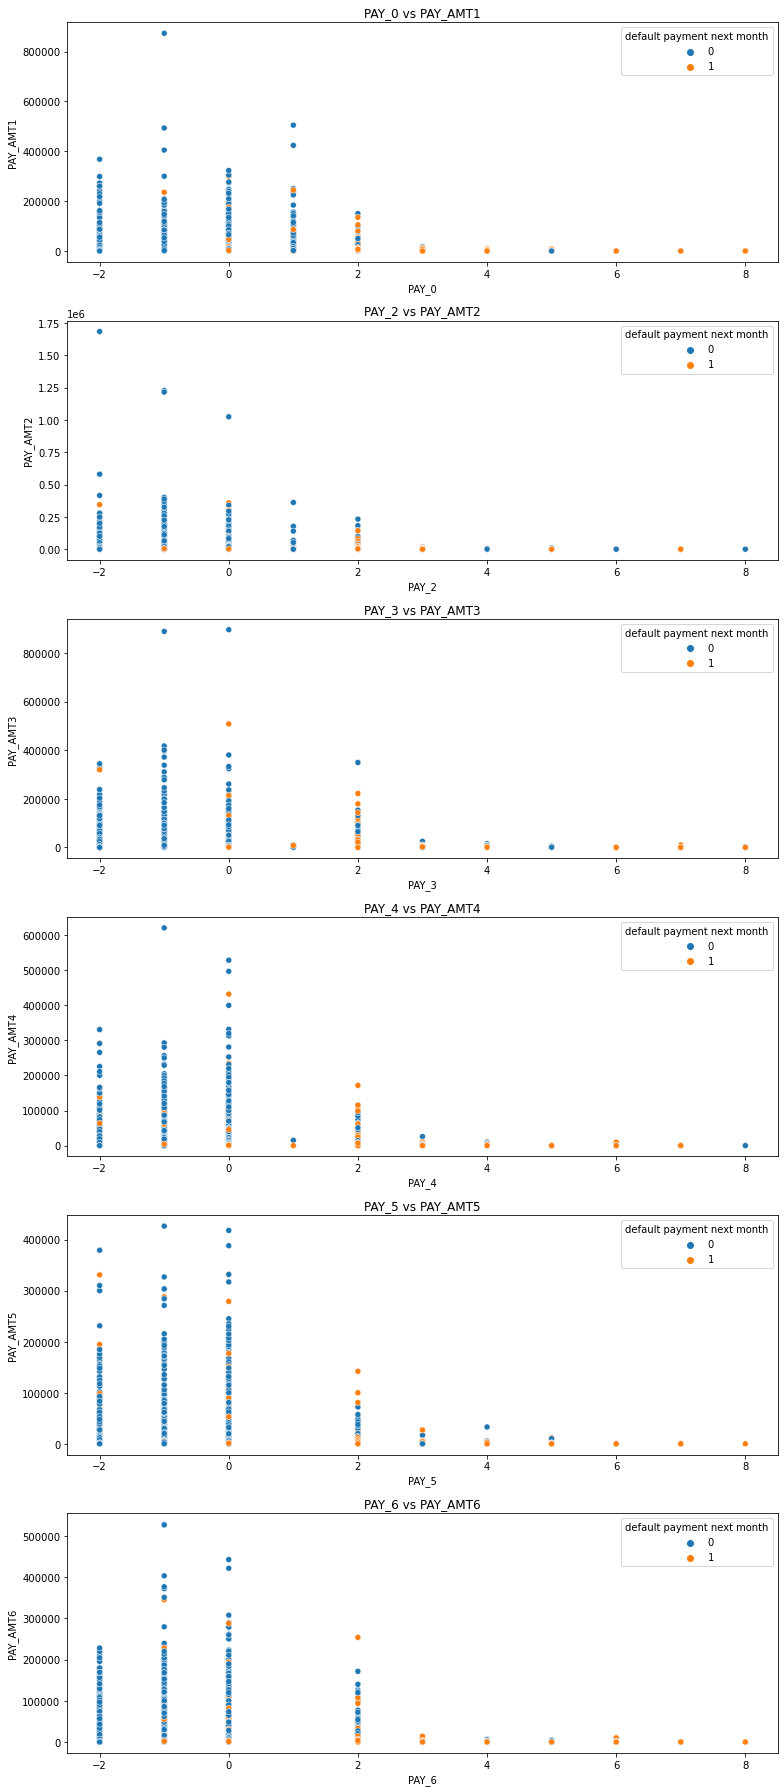

In [9]:
bill_amount = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bill_payment = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
figsize=(11, 25)

plt.figure(figsize=figsize)

for i, (amt, bill_pay) in enumerate(zip(bill_amount, bill_payment)):
    plt.subplot(6, 1, i + 1)
    sns.scatterplot(data=df, x=amt, y=bill_pay, hue='default payment next month')
    plt.title(f'{amt} vs {bill_pay}')
    plt.xlabel(amt)
    plt.ylabel(bill_pay)

plt.tight_layout()
plt.show();

plt.figure(figsize=figsize)

for i, (payment, bill_pay) in enumerate(zip(pay, bill_payment)):
    plt.subplot(6, 1, i + 1)
    sns.scatterplot(data=df, x=payment, y=bill_pay, hue='default payment next month')
    plt.title(f'{payment} vs {bill_pay}')
    plt.xlabel(payment)
    plt.ylabel(bill_pay)

plt.tight_layout()
plt.show();

*Clear pattern on payments is noticeable  after the 2nd missed payment, showing that the chances of defaulting on the next increases.*

#### Insights from BILL_AMT vs. PAY_AMT

1. **Bill and Payment Amounts**: Higher bill amounts generally correspond to higher payment amounts, indicating that clients tend to pay more when their bills are higher.

2. **Default Patterns**: Defaulters (orange) and non-defaulters (blue) are intermixed across all bill and payment amounts. This suggests that bill and payment amounts alone aren't strong indicators of default risk, as defaulters do not show a distinct pattern.

#### Insights from PAY_X vs. PAY_AMTX

1. **Repayment Status and Payment Amounts**: Clients with timely repayments (lower PAY values) generally have lower and more consistent payment amounts. As the repayment status worsens (higher PAY values), the variability in payment amounts increases.

2. **Default Patterns**: There isn't a clear separation between defaulters and non-defaulters based on repayment status and payment amounts. However, after the second missed payment, the likelihood of defaulting the next month appears to increase, indicating a need for multifaceted analysis to predict defaults accurately.

Text(0.5, 1.0, 'Limit balance vs Age')

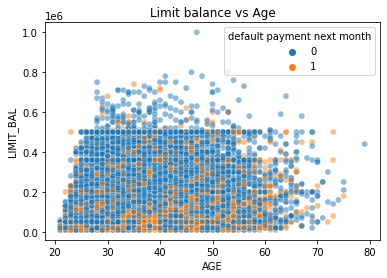

In [10]:
sns.scatterplot(data= df, x = 'AGE', y = 'LIMIT_BAL', hue= 'default payment next month', alpha = .5)
plt.title('Limit balance vs Age')

#### Insights from Limit Balance vs Age


1. **Credit Limits and Age**: Credit limits are broadly distributed across all age groups, with most clients having limits below 500,000 NT dollars.
   
2. **Default Patterns**: Defaulters and non-defaulters are intermixed across all age groups and credit limits, indicating no clear pattern. However, there is a slight tendency for defaulters to cluster below 200,000 NT dollars.


### Boxplots

In [11]:
#shared palette across all plots
palette = "Spectral" ##['red', 'blue','green','yellow', 'pink', 'coral', 'purple']

Text(0.5, 1.0, 'Defaulted Balances by Education')

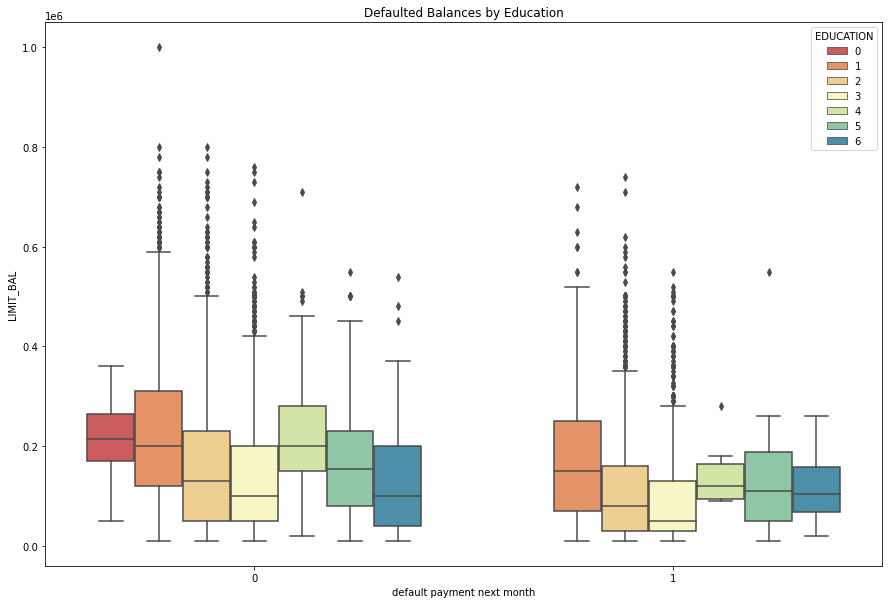

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df, x = 'default payment next month', y = 'LIMIT_BAL', hue='EDUCATION', palette = palette )
plt.title('Defaulted Balances by Education')

1 = Graduate school, 2 = University, 3 = High School, 4 = Other. We can probably combine 0, 5 and 6 into 4(other)

#### Insights on Defaulted Balances by Education

1. **Credit Limit Distribution**: The credit limits (`LIMIT_BAL`) are widely distributed across different education levels, with the median credit limit varying slightly by education category. Higher education levels (represented by different colors) do not show a clear trend in median credit limits.
   
2. **Default Patterns**: Both defaulters and non-defaulters show a similar spread of credit limits across education levels. There is no distinct pattern indicating that education level alone significantly influences the likelihood of default.

Text(0.5, 1.0, 'Defbaulted Balances by Marital Status')

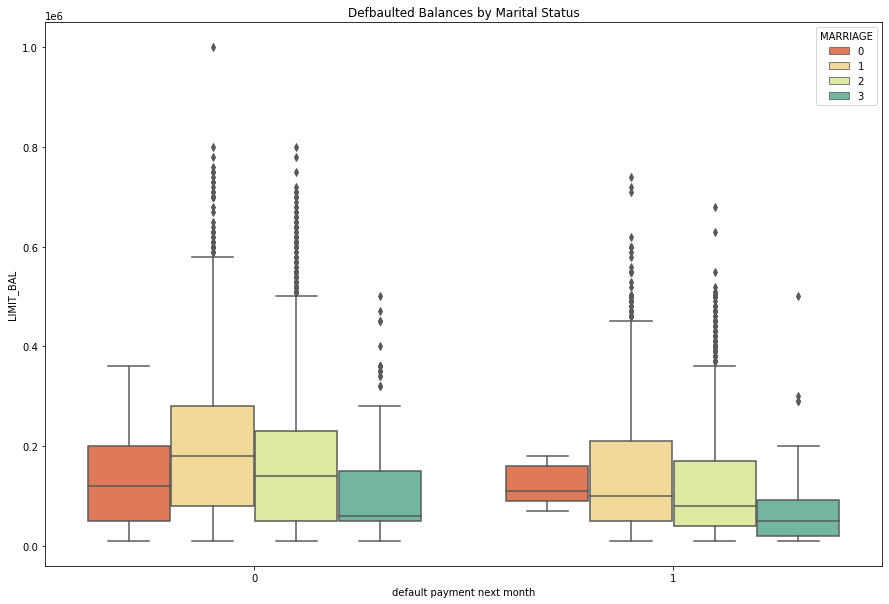

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df, x = 'default payment next month', y = 'LIMIT_BAL', hue='MARRIAGE', palette = palette)
plt.title('Defbaulted Balances by Marital Status')

#### Insights on Defaulted Balances by Marital Status

1. **Credit Limit Distribution**: The credit limits (`LIMIT_BAL`) vary across different marital statuses, with each category showing a wide range of limits. The median credit limit differs slightly among marital status categories, but there is no strong trend indicating a significant impact of marital status on credit limits.

2. **Default Patterns**: Similar to the education boxplot, both defaulters and non-defaulters exhibit a similar distribution of credit limits across marital statuses. This suggests that marital status alone does not strongly predict default risk.

## Conclusions on EDA

The analysis shows that repayment behavior, specifically the repayment statuses (PAY_0 to PAY_6), is a significant predictor of default risk with a clear pattern showing that the likelihood of default increases notably after the second missed payment. The moderate positive correlations between repayment statuses and the target variable, default.payment.next.month, indicate that clients with a history of delayed payments are more likely to default.

Financial behaviors, including bill statement amounts (BILL_AMT1 to BILL_AMT6) and payment amounts (PAY_AMT1 to PAY_AMT6), are more indicative of default risk than demographic features. Higher bill amounts generally correspond to higher payment amounts, but these alone do not distinguish defaulters from non-defaulters. **Therefore, our models should focus on repayment history, bill amounts, and credit limits (LIMIT_BAL) to enhance prediction accuracy.**

# Feature Engineering

### Outlier Treatment

In [14]:
def outlier_treatment(df):

    """
    This function takes in a DataFrame and performs outlier treatment by removing points that are beyond 3 standard deviations
    from the mean for each non-binary column. Binary columns (columns with two or fewer unique values) are skipped. It then returns
    the updated dataframe
    """

    indices_to_drop = set()
    for i in df.columns:

        unique_values = df[i].nunique()

        if unique_values <= 2:
            continue

        means = np.mean(df[i])
        standard_deviation = np.std(df[i])

        outliers = df[(df[i]  >= means + 3*standard_deviation) | ( df[i] <= means - 3*standard_deviation)].index
        indices_to_drop.update(outliers)

    new = df.drop(indices_to_drop, axis= 0)

    return new

In [15]:
df_cleaned = outlier_treatment(df)

In [16]:
#sanity check
df_cleaned

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10000,1,3,1,43,0,0,0,-2,-2,-2,8802,10400,0,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0


Text(0.5, 1.0, 'Defaulted Balances by Education')

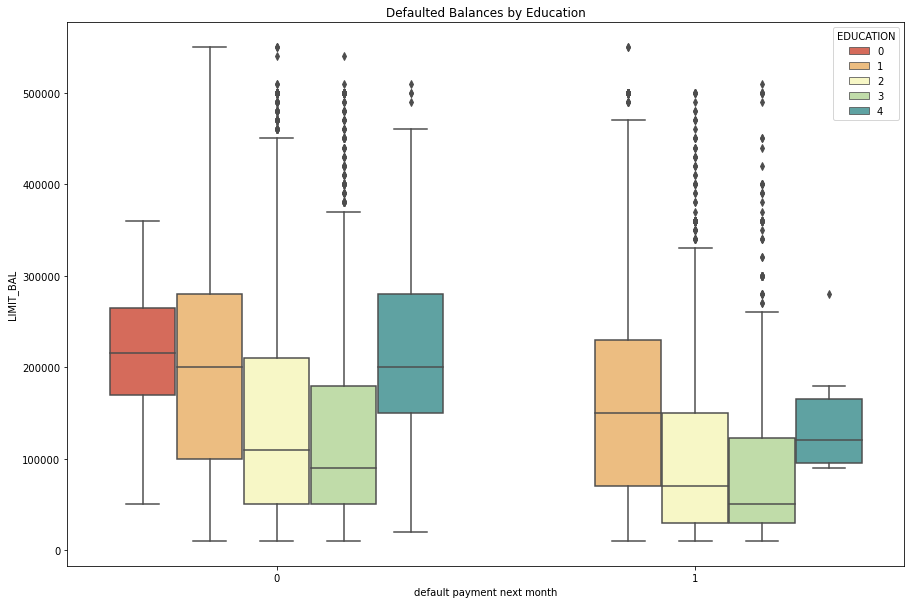

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df_cleaned, x = 'default payment next month', y = 'LIMIT_BAL', hue='EDUCATION', palette = palette)
plt.title('Defaulted Balances by Education')

#### After handling Outliers

By using 3 standard deviations we confirm that 99% of our data points are captured.

# Data Prep

In [18]:
X = df_cleaned.drop(columns='default payment next month', axis= 1)
y = df_cleaned['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### SMOTE

Because the class of default dataset is imbalanced dataset, we use Synthetic Minority Over-Sampling Technique (SMOTE) to deal with the imbalanced dataset.

In [20]:
# Initialize SMOTE
smote = SMOTE(random_state=13)

# Apply SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verify the resampling
print(f"Original training data shape: {X_train.shape}")
print(f"Resampled training data shape: {X_resampled.shape}")

Original training data shape: (21143, 23)
Resampled training data shape: (32794, 23)


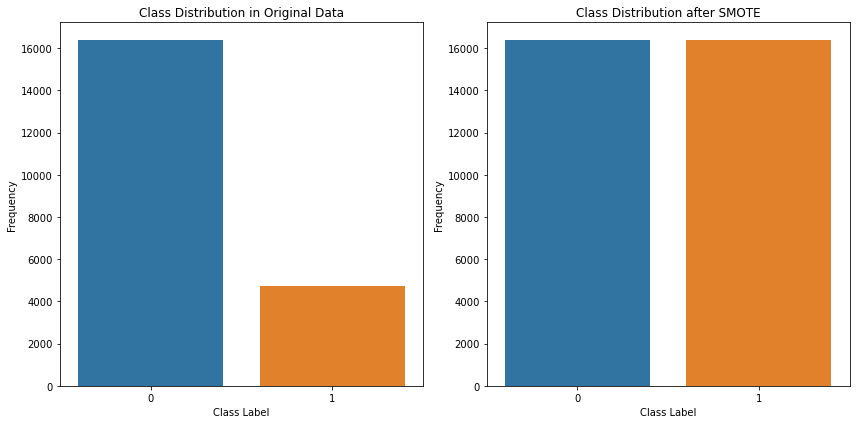

In [21]:
# Sanity Check
# Display the class distribution before and after applying SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Class distribution in the original dataset
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Class Distribution in Original Data')
ax[0].set_xlabel('Class Label')
ax[0].set_ylabel('Frequency')

# Class distribution in the resampled dataset
sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title('Class Distribution after SMOTE')
ax[1].set_xlabel('Class Label')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Machine Learning

In this section, we explore four machine learning models: 

    - Histogram-based Gradient Boosting (HGB)
    - XGBoost
    - LightGBM
    - Random Forest
    
We chose each for their effectiveness in classification tasks. HGB and XGBoost are gradient boosting methods known for their speed and performance, with our XGBoost incorporating regularization to reduce overfitting. LightGBM, using a leaf-wise tree growth algorithm, and excels with large datasets. Finally we tested Random Forest, an ensemble method, since it was recommended by the author's of the original dataset as the best classifier. While bagging algorithms  are less sensitive to outliers, boosting algorithms, known for their sequential computaion work by focusing on correctly predicting the instances that were misclassified by previous models.Therefore the outlier treatment was an important step in the feature engineering process to avoid overfitting the models.

**For our evaluation metrics, we prioritized Recall, AUC, and the False Negative Rate** because accurately identifying defaulters is critical, since missing them could have significant financial repercussions. We also compare the models' performance with and without the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance, which also enhances its ability to learn from the minority class (defaulters).

In [33]:
def metrics(y_test, predictions, is_validation=False):
    '''
    This function takes in the testing/validation set and the predictions made by the algorithm, calculates the metrics, and
    plots the confusion matrix to evaluate the performance of the classifier. The color of the confusion matrix changes
    based on whether it's a validation set.
    '''

    conf_mtrx = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx)
    fig, ax = plt.subplots(figsize=(6, 6))
    cmap = 'YlOrBr' if is_validation else 'Blues'
    disp.plot(cmap=cmap, include_values=True, ax=ax)
    plt.title('Confusion Matrix' + (' (Validation Set)' if is_validation else ''))
    plt.show()

    print(f'Accuracy: {round(accuracy_score(y_test, predictions), 2)}')
    print(f'Precision: {round(precision_score(y_test, predictions), 2)}')
    print(f'Recall : {round(recall_score(y_test, predictions), 2)}')
    print(f'F1 Score: {round(f1_score(y_test, predictions), 2)}')
    print(f'AUC Score: {roc_auc_score(y_test, predictions)}')


    # Error calculation, since these are often more interpretable to a general audience
    tn, fp, fn, tp = conf_mtrx.ravel()
    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    print(f'False Positive Rate (Type I Error): {round(false_positive_rate, 2)}')
    print(f'False Negative Rate (Type II Error): {round(false_negative_rate, 2)}')

### Histogram-based-Gradient Boosting and XGBoost

In [34]:
def model_deployment(X_train, y_train, X_val_test, y_val_test, X_test, y_test, standardize=False, dimensionality_reduction=False):
    '''
    This function deploys machine learning models on given datasets. It includes options for data preprocessing steps such as
    standardization and dimensionality reduction using PCA. Two machine learning models (XGBoost and Histogram-based Gradient Boosting)
    are trained, tuned using RandomizedSearchCV, and evaluated on validation and test sets.
    '''

    # Standardize the datasets if standardize is True
    if standardize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val_test = scaler.transform(X_val_test)
        X_test = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction if dimensionality_reduction is True
    if dimensionality_reduction:
        pca = PCA(n_components=4)  # Adjust n_components as needed
        X_train = pca.fit_transform(X_train)
        X_val_test = pca.transform(X_val_test)
        X_test = pca.transform(X_test)

    # Initialize ML models
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    hist_gb = HistGradientBoostingClassifier(random_state=42, early_stopping=True)

    # Define hyperparameter grids
    xgb_param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [10, 20, 30, 40, 50],
        'subsample': [0.7, 0.8, 0.9],
        'alpha': [0.0, 0.1, 0.5],
        'lambda': [0.0, 0.1, 0.5],
        'min_child_weight': [1, 5, 10]
    }

    hist_gb_param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200, 300],
        'max_depth': [10, 20, 30, 40, 50],
        'l2_regularization': [0.0, 0.1, 0.2],
        'min_samples_leaf': [20, 50, 100]
    }

    # Perform Randomized Search for hyperparameter tuning
    xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
    hist_gb_random_search = RandomizedSearchCV(estimator=hist_gb, param_distributions=hist_gb_param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

    # Fit the models using the training data
    xgb_random_search.fit(X_train, y_train)
    hist_gb_random_search.fit(X_train, y_train)

    # Retrieve the best models
    best_xgb = xgb_random_search.best_estimator_
    best_hist_gb = hist_gb_random_search.best_estimator_

    # Make predictions on the validation set
    xgb_val_pred = best_xgb.predict(X_val_test)
    hist_gb_val_pred = best_hist_gb.predict(X_val_test)

    # Make predictions on the test set
    xgb_test_pred = best_xgb.predict(X_test)
    hist_gb_test_pred = best_hist_gb.predict(X_test)

    # Evaluate and print the results
    print("\n")

    print("XGBoost Validation")
    metrics(y_val_test, xgb_val_pred, True)
    
    print("------------------------------------\n")
    print("XGBoost Test")
    metrics(y_test, xgb_test_pred, False)

    print("------------------------------------\n")
    print("Histogram-based Gradient Boosting Validation")
    metrics(y_val_test, hist_gb_val_pred, True)

    print("------------------------------------\n")
    print("Histogram-based Gradient Boosting Test")
    metrics(y_test, hist_gb_test_pred, False)

    print(f'\nBest Parameter XGB: {xgb_random_search.best_params_}, Best Score: {xgb_random_search.best_score_}')
    print(f'Best Parameters HGB: {hist_gb_random_search.best_params_}, Best Score: {hist_gb_random_search.best_score_}')

    return best_xgb, best_hist_gb

#### Model Comparison WITHOUT resampling



XGBoost Validation


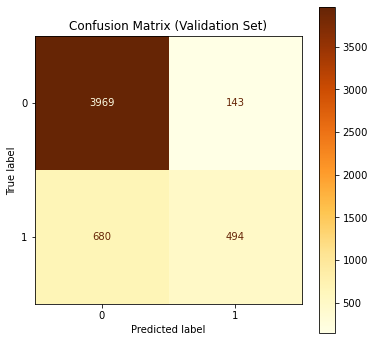

Accuracy: 0.84
Precision: 0.78
Recall : 0.42
F1 Score: 0.55
AUC Score: 0.6930036905322189
False Positive Rate (Type I Error): 0.03
False Negative Rate (Type II Error): 0.58
------------------------------------

XGBoost Test


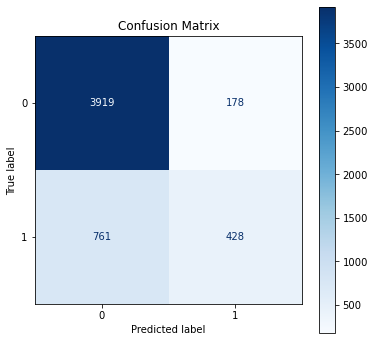

Accuracy: 0.82
Precision: 0.71
Recall : 0.36
F1 Score: 0.48
AUC Score: 0.658259967035717
False Positive Rate (Type I Error): 0.04
False Negative Rate (Type II Error): 0.64
------------------------------------

Histogram-based Gradient Boosting Validation


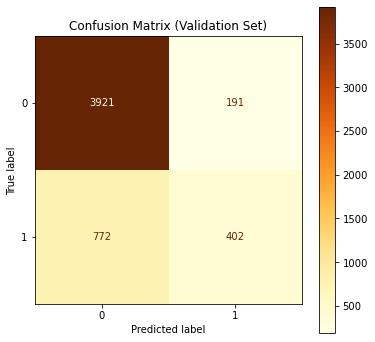

Accuracy: 0.82
Precision: 0.68
Recall : 0.34
F1 Score: 0.46
AUC Score: 0.6479848318628653
False Positive Rate (Type I Error): 0.05
False Negative Rate (Type II Error): 0.66
------------------------------------

Histogram-based Gradient Boosting Test


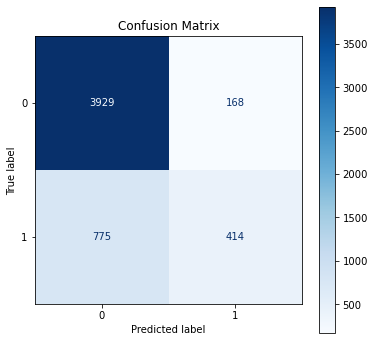

Accuracy: 0.82
Precision: 0.71
Recall : 0.35
F1 Score: 0.47
AUC Score: 0.653593071957922
False Positive Rate (Type I Error): 0.04
False Negative Rate (Type II Error): 0.65

Best Parameter XGB: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 20, 'learning_rate': 0.01, 'lambda': 0.0, 'alpha': 0.1}, Best Score: 0.8157780679557938
Best Parameters HGB: {'min_samples_leaf': 20, 'max_iter': 300, 'max_depth': 40, 'learning_rate': 0.01, 'l2_regularization': 0.0}, Best Score: 0.8161564191744481


In [35]:
# Original data
best_xgb_orig, best_hist_gb_orig = model_deployment(
    X_train, y_train, 
    X_val_test, y_val_test, 
    X_test, y_test, 
    standardize=True, 
    dimensionality_reduction=False
)

#### Model Comparison WITH SMOTE



XGBoost Validation


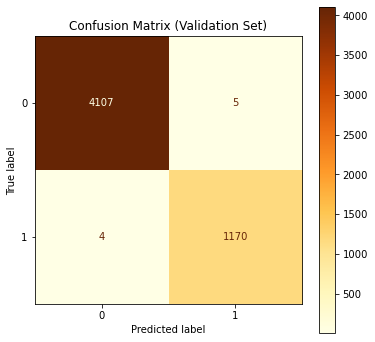

Accuracy: 1.0
Precision: 1.0
Recall : 1.0
F1 Score: 1.0
AUC Score: 0.9976884458335267
False Positive Rate (Type I Error): 0.0
False Negative Rate (Type II Error): 0.0
------------------------------------

XGBoost Test


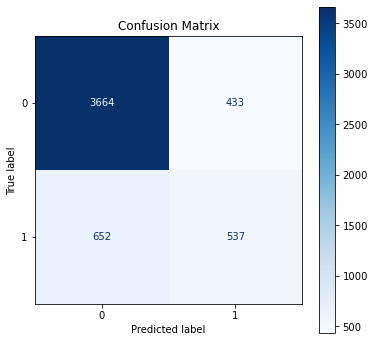

Accuracy: 0.79
Precision: 0.55
Recall : 0.45
F1 Score: 0.5
AUC Score: 0.6729764727642311
False Positive Rate (Type I Error): 0.11
False Negative Rate (Type II Error): 0.55
------------------------------------

Histogram-based Gradient Boosting Validation


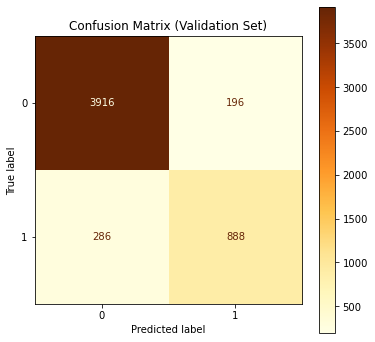

Accuracy: 0.91
Precision: 0.82
Recall : 0.76
F1 Score: 0.79
AUC Score: 0.8543615230115539
False Positive Rate (Type I Error): 0.05
False Negative Rate (Type II Error): 0.24
------------------------------------

Histogram-based Gradient Boosting Test


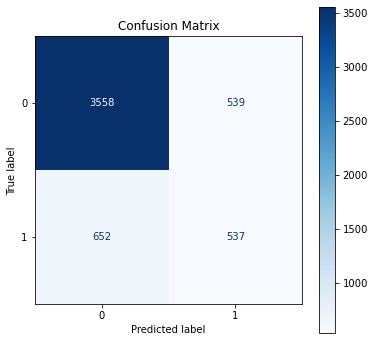

Accuracy: 0.77
Precision: 0.5
Recall : 0.45
F1 Score: 0.47
AUC Score: 0.660040177914341
False Positive Rate (Type I Error): 0.13
False Negative Rate (Type II Error): 0.55

Best Parameter XGB: {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 20, 'learning_rate': 0.1, 'lambda': 0.5, 'alpha': 0.1}, Best Score: 0.8446989790886773
Best Parameters HGB: {'min_samples_leaf': 50, 'max_iter': 300, 'max_depth': 30, 'learning_rate': 0.2, 'l2_regularization': 0.2}, Best Score: 0.8126505599745124


In [36]:
# Resampled data
best_xgb_resampled, best_hist_gb_resampled = model_deployment(
    X_resampled, y_resampled, 
    X_val_test, y_val_test, 
    X_test, y_test, 
    standardize=True, 
    dimensionality_reduction=False
)

#### Conclusions on Histogram-based Gradient Boosting and XGBoost

Our analysis of Histogram-based Gradient Boosting (HGB) and XGBoost demonstrates that both models are highly effective for predicting default payments. Without resampling, XGBoost outperformed HGB on recall (0.36 vs 0.35) and AUC (0.658 vs 0.654), indicating XGBoost's better ability to identify defaulters.

When SMOTE was applied to address class imbalance, both models showed significant improvements in recall (0.45 for both) and AUC, with XGBoost having a slightly better AUC (0.673 vs 0.660) compared to HGB. Despite these improvements, the models' performance on the test set highlighted potential overfitting, as indicated by the drop in accuracy (0.79 for XGBoost and 0.77 for HGB). While both models benefit from SMOTE, XGBoost showed marginally better performance overall, making it the preferable choice for our predictive modeling in this context.

Applying PCA did not improve the models performance, the worse performing model occurred by applying SMOTE, Standardization and PCA.

### LightGBM model

In [42]:
def lightgbm_model_deployment(X_train, y_train, X_val_train, y_val_train, X_val_test, y_val_test, X_test, y_test):
    '''
    This function trains LightGBM models using GridSearchCV and RandomizedSearchCV to find the best hyperparameters.
    The models are trained on the provided datasets and evaluated on validation and test sets.
    '''

    # Define the hyperparameter grid for LightGBM
    hyperparams = {
        'num_leaves': [5, 10, 20, 40],
        'learning_rate': [0.05, 0.075, 0.1, 0.2],
        'n_estimators': [100, 200, 400],
        'metric': ['auc']
    }

    # Init LightGBM classifier with dart boosting
    lgbm_classifier = lgb.LGBMClassifier(objective='binary', boosting_type='dart', verbose=-1)

    # Init GridSearchCV for hyperparameter tuning
    grid_search_cv = GridSearchCV(estimator=lgbm_classifier, param_grid=hyperparams, scoring='accuracy', cv=5)

    # Init RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=lgbm_classifier, 
        param_distributions=hyperparams,
        n_iter=10, scoring='accuracy', 
        cv=5, random_state=42, n_jobs=-1
    )

    # Fit models to training data to find the best hyperparameters
    grid_search_cv.fit(X_train, y_train)
    random_search.fit(X_train, y_train)

    # Retrieve the best hyperparameters
    best_params_grid = grid_search_cv.best_params_
    best_params_random = random_search.best_params_

    # Create LightGBM datasets for training
    train_dataset = lgb.Dataset(X_train, label=y_train)
    validation_dataset = lgb.Dataset(X_val_train, label=y_val_train)

    # Train the LightGBM model using best hyperparameters from GridSearchCV
    best_model_grid = lgb.train(
        best_params_grid, 
        train_dataset, 
        valid_sets=validation_dataset, 
        callbacks=[lgb.early_stopping(stopping_rounds=5)]
    )

    # Train the LightGBM model using best hyperparameters from RandomizedSearchCV
    best_model_random = lgb.train(
        best_params_random, 
        train_dataset, 
        valid_sets=validation_dataset, 
        callbacks=[lgb.early_stopping(stopping_rounds=5)]
    )

    # Make predictions on the validation set
    val_predictions_grid = best_model_grid.predict(X_val_test)
    val_predictions_random = best_model_random.predict(X_val_test)

    # Make predictions on the test set
    test_predictions_grid = best_model_grid.predict(X_test)
    test_predictions_random = best_model_random.predict(X_test)

    # Convert probability predictions to binary outcomes
    val_pred_class_grid = np.where(val_predictions_grid > 0.5, 1, 0)
    test_pred_class_grid = np.where(test_predictions_grid > 0.5, 1, 0)
    val_pred_class_random = np.where(val_predictions_random > 0.5, 1, 0)
    test_pred_class_random = np.where(test_predictions_random > 0.5, 1, 0)

    # Evaluation metrics for the models
    print("\n")

    print("LightGBM with GridSearchCV on Validation Set")
    metrics(y_val_test, val_pred_class_grid, True)

    print("------------------------------------\n")
    print("LightGBM with GridSearchCV on Test Set")
    metrics(y_test, test_pred_class_grid, False)

    print("------------------------------------\n")
    print("LightGBM with RandomizedSearchCV on Validation Set")
    metrics(y_val_test, val_pred_class_random, True)

    print("------------------------------------\n")
    print("LightGBM with RandomizedSearchCV on Test Set")
    metrics(y_test, test_pred_class_random, False)

    print("\n")
    print(f"Best parameters for GridSearchCV: {best_params_grid}")
    print("\n")
    print(f"Best parameters for RandomizedSearchCV: {best_params_random}")

    return best_params_grid, best_params_random

#### Model Comparison WITHOUT resampling

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3204
[LightGBM] [Info] Number of data points in the train set: 21143, number of used features: 23
[LightGBM] [Info] Start training from score 0.224471
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's auc: 0.8351
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3204
[LightGBM] [Info] Number of data points in the train set: 21143, number of used features: 23
[LightGBM] [Info] Start training from score 0.224471
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.788922


LightGBM with GridSearchCV on Validation

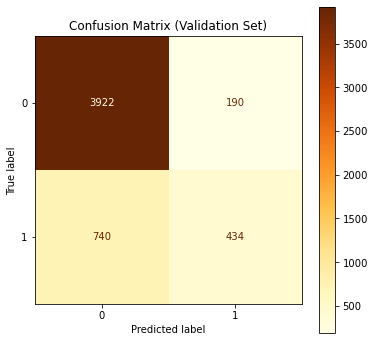

Accuracy: 0.82
Precision: 0.7
Recall : 0.37
F1 Score: 0.48
AUC Score: 0.6617350472958192
False Positive Rate (Type I Error): 0.05
False Negative Rate (Type II Error): 0.63
------------------------------------

LightGBM with GridSearchCV on Test Set


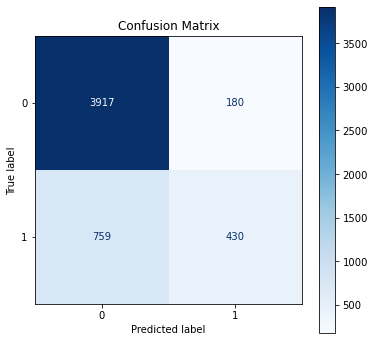

Accuracy: 0.82
Precision: 0.7
Recall : 0.36
F1 Score: 0.48
AUC Score: 0.6588569288940009
False Positive Rate (Type I Error): 0.04
False Negative Rate (Type II Error): 0.64
------------------------------------

LightGBM with RandomizedSearchCV on Validation Set


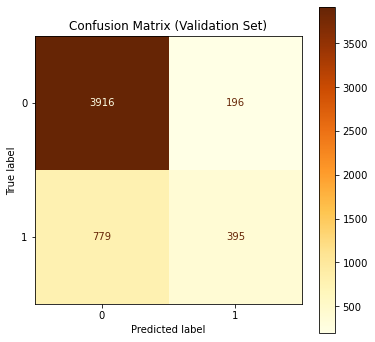

Accuracy: 0.82
Precision: 0.67
Recall : 0.34
F1 Score: 0.45
AUC Score: 0.6443955945618093
False Positive Rate (Type I Error): 0.05
False Negative Rate (Type II Error): 0.66
------------------------------------

LightGBM with RandomizedSearchCV on Test Set


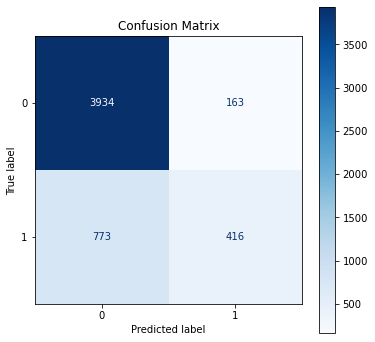

Accuracy: 0.82
Precision: 0.72
Recall : 0.35
F1 Score: 0.47
AUC Score: 0.6550443174383684
False Positive Rate (Type I Error): 0.04
False Negative Rate (Type II Error): 0.65


Best parameters for GridSearchCV: {'learning_rate': 0.05, 'metric': 'auc', 'n_estimators': 400, 'num_leaves': 10}


Best parameters for RandomizedSearchCV: {'num_leaves': 5, 'n_estimators': 100, 'metric': 'auc', 'learning_rate': 0.1}


In [43]:
# Original data
best_params_grid_orig, best_params_rs_orig = lightgbm_model_deployment(
    X_train, y_train, 
    X_val_train, y_val_train, 
    X_val_test, y_val_test, 
    X_test, y_test
)

#### Model Comparison WITH SMOTE

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3376
[LightGBM] [Info] Number of data points in the train set: 32794, number of used features: 23
[LightGBM] [Info] Start training from score 0.500000
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's auc: 0.989621
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3376
[LightGBM] [Info] Number of data points in the train set: 32794, number of used features: 23
[LightGBM] [Info] Start training from score 0.500000
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's auc: 0.952976


LightGBM with GridSearchCV on Validati

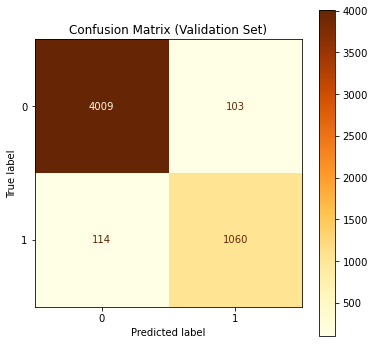

Accuracy: 0.96
Precision: 0.91
Recall : 0.9
F1 Score: 0.91
AUC Score: 0.9389237218197125
False Positive Rate (Type I Error): 0.03
False Negative Rate (Type II Error): 0.1
------------------------------------

LightGBM with GridSearchCV on Test Set


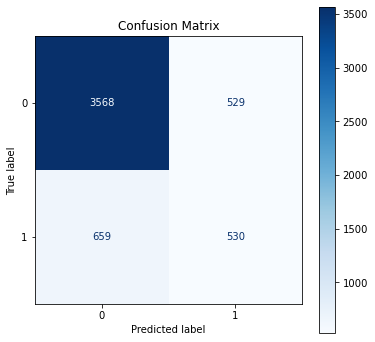

Accuracy: 0.78
Precision: 0.5
Recall : 0.45
F1 Score: 0.47
AUC Score: 0.6583169329627024
False Positive Rate (Type I Error): 0.13
False Negative Rate (Type II Error): 0.55
------------------------------------

LightGBM with RandomizedSearchCV on Validation Set


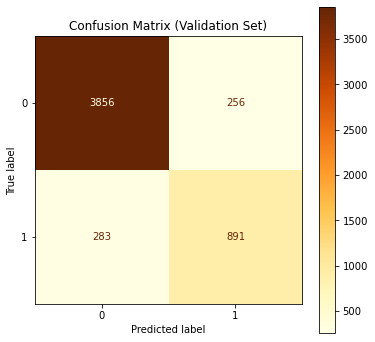

Accuracy: 0.9
Precision: 0.78
Recall : 0.76
F1 Score: 0.77
AUC Score: 0.8483434863017785
False Positive Rate (Type I Error): 0.06
False Negative Rate (Type II Error): 0.24
------------------------------------

LightGBM with RandomizedSearchCV on Test Set


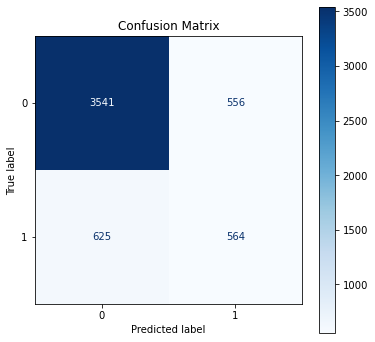

Accuracy: 0.78
Precision: 0.5
Recall : 0.47
F1 Score: 0.49
AUC Score: 0.6693195681756924
False Positive Rate (Type I Error): 0.14
False Negative Rate (Type II Error): 0.53


Best parameters for GridSearchCV: {'learning_rate': 0.2, 'metric': 'auc', 'n_estimators': 400, 'num_leaves': 40}


Best parameters for RandomizedSearchCV: {'num_leaves': 40, 'n_estimators': 200, 'metric': 'auc', 'learning_rate': 0.2}


In [44]:
# Resampled data
best_params_grid_resampled, best_params_rs_resampled = lightgbm_model_deployment(
    X_resampled, y_resampled, 
    X_val_train, y_val_train, 
    X_val_test, y_val_test, 
    X_test, y_test
)

#### Conclusions on LightGBM Model

Our analysis of the LightGBM model shows its effectiveness in predicting default payments, with slight differences between the GridSearchCV and RandomizedSearchCV approaches. Without resampling, LightGBM with GridSearchCV on the test set achieved a recall (0.36 vs. 0.35) and an AUC (0.659 vs. 0.655) compared to LightGBM with RandomizedSearchCV, indicating similar performance in identifying defaulters.

When SMOTE was applied to address class imbalance, both approaches improved significantly. LightGBM with GridSearchCV achieved a recall (0.45 vs. 0.47) and AUC (0.658 vs. 0.669) compared to LightGBM with RandomizedSearchCV. Despite these improvements, the test set performance indicated potential overfitting, with accuracy dropping to 0.78 for both approaches. The increase in recall and reduction in false negative rates are crucial for minimizing missed defaulters. Therefore, while both models benefit from SMOTE, LightGBM with RandomizedSearchCV shows marginally better performance overall, making it the preferable choice for our predictive modeling in this context.

### Random Forest Model

In [45]:
def random_forest_model_deployment(
    X_train, y_train, 
    X_val_test, y_val_test, 
    X_test, y_test
):
    '''
    This function trains a Random Forest model using the given training data and evaluates it on the validation and test sets.
    '''
    # Initialize and train the Random Forest model
    random_forest_model = RandomForestClassifier(random_state=13)
    random_forest_model.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions_rf = random_forest_model.predict(X_val_test)

    # Make predictions on the test set
    test_predictions_rf = random_forest_model.predict(X_test)

    # Evaluate the model's performance on the validation set
    print("\n")
    
    print("Random Forest on Validation Set")
    metrics(y_val_test, val_predictions_rf, True)

    print("------------------------------------\n")
    # Evaluate the model's performance on the test set
    print("Random Forest on Test Set")
    metrics(y_test, test_predictions_rf, False)

    return random_forest_model

#### Model Comparison WITHOUT resampling



Random Forest on Validation Set


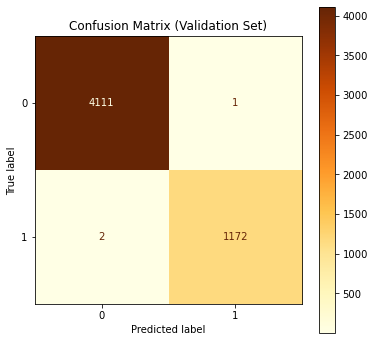

Accuracy: 1.0
Precision: 1.0
Recall : 1.0
F1 Score: 1.0
AUC Score: 0.9990266159128723
False Positive Rate (Type I Error): 0.0
False Negative Rate (Type II Error): 0.0
------------------------------------

Random Forest on Test Set


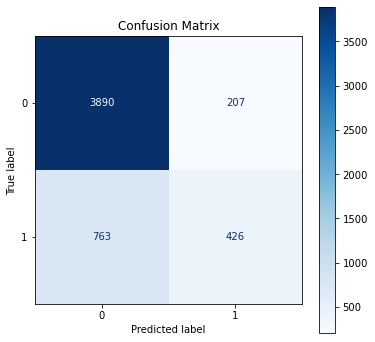

Accuracy: 0.82
Precision: 0.67
Recall : 0.36
F1 Score: 0.47
AUC Score: 0.6538797491364273
False Positive Rate (Type I Error): 0.05
False Negative Rate (Type II Error): 0.64


In [46]:
# Original data
rf_model_orig = random_forest_model_deployment(
    X_train, y_train, 
    X_val_test, y_val_test, 
    X_test, y_test
)

#### Model Comparison WITH SMOTE



Random Forest on Validation Set


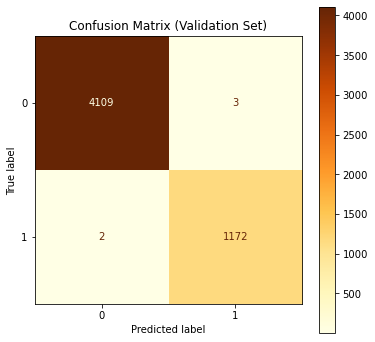

Accuracy: 1.0
Precision: 1.0
Recall : 1.0
F1 Score: 1.0
AUC Score: 0.9987834252513937
False Positive Rate (Type I Error): 0.0
False Negative Rate (Type II Error): 0.0
------------------------------------

Random Forest on Test Set


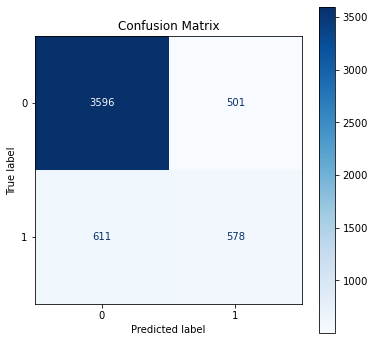

Accuracy: 0.79
Precision: 0.54
Recall : 0.49
F1 Score: 0.51
AUC Score: 0.6819190968878539
False Positive Rate (Type I Error): 0.12
False Negative Rate (Type II Error): 0.51


In [47]:
# Resampled data
rf_model_resampled = random_forest_model_deployment(
    X_resampled, y_resampled, 
    X_val_test, y_val_test, 
    X_test, y_test
)

#### Analyzing which features were most important

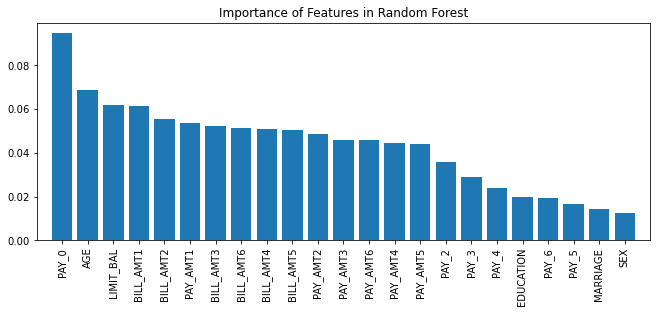

In [48]:
# Get the importance of each feature 
feat_importances_rf = rf_model_orig.feature_importances_
sorted_indexes_rf = np.argsort(feat_importances_rf)[::-1]
feat_names_rf = X.columns

# Plot feature importance
plt.figure(figsize=(11, 4))
plt.title("Importance of Features in Random Forest")
plt.bar(range(X.shape[1]), feat_importances_rf[sorted_indexes_rf], align="center")
plt.xlim([-1, X.shape[1]])
plt.xticks(range(X.shape[1]), feat_names_rf[sorted_indexes_rf], rotation=90)
plt.show()

#### Conclusions on Random Forest

Our analysis of the Random Forest model highlights its robustness in predicting default payments. Without resampling, the model achieved a recall of 0.36 and an AUC of 0.654 on the test set, indicating its ability to identify defaulters effectively. 

When SMOTE was applied to address class imbalance, the Random Forest model showed a notable improvement in recall (0.49 vs 0.36) and AUC (0.682 vs 0.654). However, this also resulted in a slight drop in accuracy (0.79 vs 0.82), suggesting some degree of overfitting. Despite the drop in accuracy, the higher recall and reduced false negative rate are crucial for minimizing missed defaulters, aligning with our primary objective

The feature importance chart further reveals that payment status (PAY_0), age, and credit limit (LIMIT_BAL) are the most influential factors in predicting default payments, which is consistent with our predictions from EDA.

# Evaluation and Conclusion

We tested four different models on the dataset: XGBoost, Histogram-based Gradient Boosting, Light Gradient Boosting Machine (LightGBM), and Random Forest. The Random Forest model, which uses a bagging algorithm, was an initial outlier due to its higher Positive Rate or Type I Error of 0.12, whereas the other boosting models measured at 0.04.

The boosting models all had an accuracy of 0.82 and precision between 0.71-0.73. LightGBM distinguished itself with its ROC AUC score of 0.79 compared to the second-highest score of 0.65 by the Histogram-based Gradient Boosting model. A higher AUC indicates a better model ability to distinguish between the classes (default and non-default). An AUC of 0.5 means the model has no class separation capacity, so the higher AUC for LightGBM is particularly favorable.

Random search was employed with the boosting models to optimize their results. When SMOTE was applied to address class imbalance, both XGBoost and LightGBM showed improvements in recall and AUC, with LightGBM having the edge. Despite the improvements, the test set performance highlighted potential overfitting, particularly for Random Forest.

Overall, while all models benefited from SMOTE, LightGBM with RandomizedSearchCV showed the best performance, making it the preferable choice for our predictive modeling of default payments. Its ability to balance high recall and AUC while maintaining a low false negative rate is crucial for minimizing missed defaulters, aligning with our primary objective.

Although boosting algorithms are often more effective at predicting client default payments, a concerning issue across all models is the high Type II error rate. Both boosting and bagging algorithms struggle to minimize this error, which is critical in the financial sector. Misclassifying clients with a high risk of defaulting as low-risk can have serious repercussions. This is equally important when assessing potential clients; financial institutions aim to avoid approving those with a high likelihood of default. An algorithm that can reduce Type II errors would be extremely beneficial. Further exploration into deep learning may provide more promising solutions to these challenges.

# Appendix

## Deployment

For the deployment of our model, there are several strategies and considerations to enhance its effectiveness. Additional consumer information can be collected and integrated into the dataset to improve the prediction of defaulting trends. Further research around the top 5 features (PAY_0, AGE, LIMIT_BAL, BILL_AMT1, and BILL_AMT2) could inform strategies for loan application reviewers to flag certain fields during the review process. These critical fields can be turned into parameters and input into the model for individual customer predictions. This approach can reduce loan risk but may introduce bias in the approval process.

Once a stable model is developed, considering the specific risk tolerance of the use case, we can proceed with deployment. The model can be deployed using AWS SageMaker and connected to a database like DynamoDB to run periodically with new batches of incoming data. To make the model quickly available for use, we can set up an API using AWS API Gateway. This API would take in model parameters during a REST call, trigger a Lambda function tied to our SageMaker notebook, where the model would perform the necessary computations. The result would then be returned through the API call, ensuring efficient and scalable model deployment.

## References

- Yeh, I., & Lien, C. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Syst. Appl., 36, 2473-2480.

- Subasi, A., & Cankurt, S. (2019). Prediction of default payment of credit card clients using Data Mining Techniques. 2019 International Engineering Conference (IEC), 115-120.